__STATISTICAL APPLICATION ON AIRBNB DATA__

__CAPSTONE PROJECT #1 STATISTICAL APPLICATION__


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
airbnb = pd.read_csv('data/dfmergefinal.csv')

In [2]:
airbnb.shape

(3340486, 30)

In [3]:
airbnb.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN


In [4]:
second_elapsed= airbnb['secs_elapsed'].dropna()

In [5]:
second_elapsed.shape

(3293236,)

In [6]:
second_elapsed.head()

0      319.0
1    67753.0
2      301.0
3    22141.0
4      435.0
Name: secs_elapsed, dtype: float64

Text(0.5, 0, 'Seconds Elapsed')

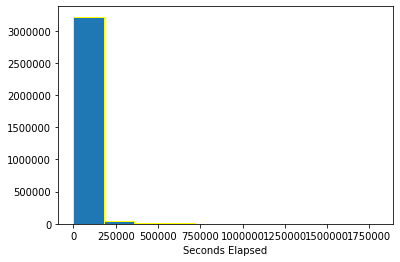

In [6]:
plt.hist(second_elapsed, edgecolor = 'yellow', bins=10)
plt.xlabel('Seconds Elapsed')

In [7]:
std_second_elapsed=np.std(second_elapsed)
mean_second_elapsed=np.mean(second_elapsed)
print("Standart Deviation: ", std_second_elapsed)
print("Mean: ", mean_second_elapsed)

Standart Deviation:  93568.48797422761
Mean:  21136.525120276834


__INTERPRETATIONS:__ Standard deviation is too high compare to mean. The histogram shows that the data is not normally distributed, but right skewed.

In [8]:
median_second_elapsed= np.median(second_elapsed)
print("Median: ", median_second_elapsed)

Median:  1222.0


In [9]:
airbnb.gender.value_counts(dropna=False)

NaN       1577464
FEMALE     983557
MALE       775840
OTHER        3625
Name: gender, dtype: int64

In [10]:
airbnb.replace("OTHER", np.nan)

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN
5,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,search_results,click,view_search_results,Windows Desktop,7703.0,NaN,NaN,NaN
6,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,115.0,NaN,NaN,NaN
7,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,personalize,data,wishlist_content_update,Windows Desktop,831.0,NaN,NaN,NaN
8,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,index,view,view_search_results,Windows Desktop,20842.0,NaN,NaN,NaN
9,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,683.0,NaN,NaN,NaN


In [11]:
airbnb.gender.value_counts(dropna=False)

NaN       1577464
FEMALE     983557
MALE       775840
OTHER        3625
Name: gender, dtype: int64

In [12]:
s = airbnb.gender.value_counts(normalize=True)
missing = airbnb['gender'].isnull()
airbnb.loc[missing,'gender'] = np.random.choice(s.index, size=len(airbnb[missing]),p=s.values)

In [13]:
airbnb.gender.value_counts(dropna=False)

FEMALE    1864068
MALE      1469522
OTHER        6896
Name: gender, dtype: int64

In [14]:
airbnb.gender.value_counts(normalize=True)

FEMALE    0.558023
MALE      0.439913
OTHER     0.002064
Name: gender, dtype: float64

In [15]:
dfairbnb = airbnb.replace("OTHER", np.nan)

In [16]:
dfairbnb.shape

(3340486, 30)

In [17]:
dfairbnb.gender.value_counts(dropna=False)

FEMALE    1864068
MALE      1469522
NaN          6896
Name: gender, dtype: int64

In [18]:
dfairbnb.gender.value_counts(dropna=False, normalize=True)

FEMALE    0.558023
MALE      0.439913
NaN       0.002064
Name: gender, dtype: float64

In [19]:
o = dfairbnb.gender.value_counts(normalize=True)
nan = dfairbnb['gender'].isnull()
dfairbnb.loc[nan,'gender'] = np.random.choice(o.index, size=len(dfairbnb[nan]),p=o.values)

In [20]:
dfairbnb.gender.value_counts(dropna=False, normalize=True)

FEMALE    0.559183
MALE      0.440817
Name: gender, dtype: float64

In [21]:
dfgender= pd.get_dummies(dfairbnb['gender'], prefix=None)

In [22]:
dfgender.head()

,FEMALE,MALE
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [23]:
airbnbmerged = dfairbnb.merge(dfgender, left_index=True, right_index=True)

In [24]:
airbnbmerged.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year,FEMALE,MALE
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN,0,1
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN,0,1
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN,0,1
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN,0,1
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN,0,1


In [25]:
airbnbdummies = airbnbmerged.replace("FEMALE", 0)

In [26]:
airbnbdummies = airbnbdummies.replace("MALE", 1)

In [27]:
airbnbdummies.gender.value_counts(normalize=True)

0    0.559183
1    0.440817
Name: gender, dtype: float64

In [28]:
male = airbnbdummies.secs_elapsed[airbnbdummies.gender == 1]  
female = airbnbdummies.secs_elapsed[airbnbdummies.gender == 0]
mean_male = np.mean(male)
print('Mean Male:', mean_male)
mean_female = np.mean(female)
print('Mean Female:', mean_female)
std_dev_male = np.std(male)
print('Standard Deviation Male:', std_dev_male)
std_dev_female = np.std(female)
print('Standard Deviation Female:', std_dev_female)

Mean Male: 21419.080393675504
Mean Female: 20913.908705258986
Standard Deviation Male: 94979.57338144242
Standard Deviation Female: 92440.96066573281


In [29]:
n0 = len(male)
n1= len(female)
std0 = male.std()
std1= female.std()
mean0 = mean_male
mean1= mean_female
sp = np.sqrt( ((n0-1)*(std0)**2 + (n1-1)*(std1)**2)/ (n0+n1-2) )
t_ = (mean1 - mean0)/(sp * np.sqrt(1/n0 + 1/n1)) 
print(t_)

-4.899142999259713


In [30]:
p_value = (1 - t(n0 + n1 - 1).cdf(t_)) * 2
p_value

1.9999990373993715

In [31]:
ttest_ind(male, female)

Ttest_indResult(statistic=nan, pvalue=nan)

In [32]:
airbnbdummies['secs_elapsed'].fillna(0, inplace=True)

In [33]:
ttest_ind(male, female, nan_policy='omit')

Ttest_indResult(statistic=4.864223759107857, pvalue=1.1491215357941798e-06)